
# Example notebook

This example will contain the following examples
- Creating and saving a graph 
- Plotting the graph 
- Executing a node
- Loading a graph from disk

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from importlib import reload
import os
import autodepgraph as adg
from autodepgraph import  AutoDepGraph_DAG

## Creatinga custom graph
A graph can be instantiated and nodes can be added to the graph as with any `networkx` graph object. 
It is important to specify a `calibrat

In [2]:
cal_True_delayed =  'autodepgraph.node_functions.calibration_functions.test_calibration_True_delayed'
test_graph = AutoDepGraph_DAG('test graph')
for node in ['A', 'B', 'C', 'D', 'E']:
    test_graph.add_node(node, 
                        calibrate_function=cal_True_delayed)

In [3]:
test_graph.add_node?

Signature: test_graph.add_node(node_for_adding, **attr)
Docstring:
Adds a node to the graph, including starting attributes.

attr:
    name        (type)  = default_value

    calibrate_function  = 'NotImplementedCalibration'
    check_functions     = 'return_fixed_value'
    tolerance   (float) = 0
    timeout     (float) = np.inf
    state       (str)   = 'unknown'
File:      ~/GitHubRepos/Personal/AutoDepGraph/autodepgraph/graph.py
Type:      method


Some nodes require other nodes to be in a `good` or calibrated state. Such dependencies are defined by setting edges in the graph. 

In [4]:
test_graph.add_edge('C', 'A')
test_graph.add_edge('C', 'B')
test_graph.add_edge('B', 'A')
test_graph.add_edge('D', 'A')
test_graph.add_edge('E', 'D')

## Visualizing the graph
We support two ways of visualizing graphs: 
- matplotlib in the notebook 
- an svg in an html page that updates in real-time

### Realtime svg/html visualization 

In [5]:
# The default plotting mode is SVG 
test_graph.cfg_plot_mode = 'svg'
# Updates the monitor, in this case the svg/html page
test_graph.update_monitor()

# Updating the monitor overwrites an svg file whose location is determined by the attribute:
test_graph.cfg_svg_filename

'/Users/adriaanrol/GitHubRepos/Personal/AutoDepGraph/autodepgraph/svg_viewer/adg_graph.svg'

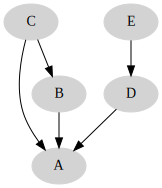

In [6]:
from IPython.display import display, SVG
display(SVG(test_graph.cfg_svg_filename))

In [7]:
# The html page is located at the location specified by the url. 
# The page generated based on a template when the open_html_viewer command is called. 
url = test_graph.open_html_viewer()
print(url)

/Users/adriaanrol/GitHubRepos/Personal/AutoDepGraph/autodepgraph/svg_viewer/svgviewer-etruszyd.html


### Matplotlib drawing of the graph


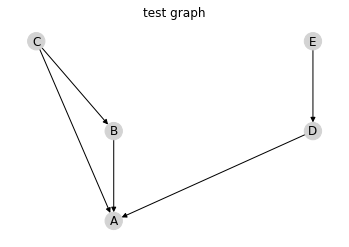

In [8]:


# Alternatively a render in matplotlib can be drawn 
test_graph.draw_mpl()

# Maintaining the graph 

In [9]:
test_graph.set_all_node_states('needs calibration')

In [10]:
test_graph.maintain_B()

Maintaining node "B".
Maintaining node "A".
	Calibrating node A.
	Calibration of node A successful.
	Calibrating node B.
	Calibration of node B successful.


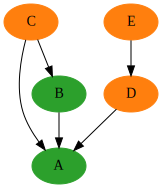

In [11]:
display(SVG(test_graph.cfg_svg_filename))

In [12]:
# Update the plotting monitor (default matplotlib) to show your graph
test_graph.update_monitor()

In [14]:
test_graph.set_all_node_states('needs calibration')

In [15]:
test_graph.maintain_node('E')

Maintaining node "E".
Maintaining node "D".
Maintaining node "A".
	Calibrating node A.
	Calibration of node A successful.
	Calibrating node D.
	Calibration of node D successful.
	Calibrating node E.
	Calibration of node E successful.


'good'

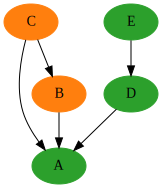

In [17]:
display(SVG(test_graph.cfg_svg_filename))

### Three qubit example

This example shows a more realistic graph. 
The examples below show ways of exploring the graph

In [18]:
test_dir = os.path.join(adg.__path__[0], 'tests', 'test_data')
fn = os.path.join(test_dir, 'three_qubit_graph.yaml')
DAG = nx.readwrite.read_yaml(fn)

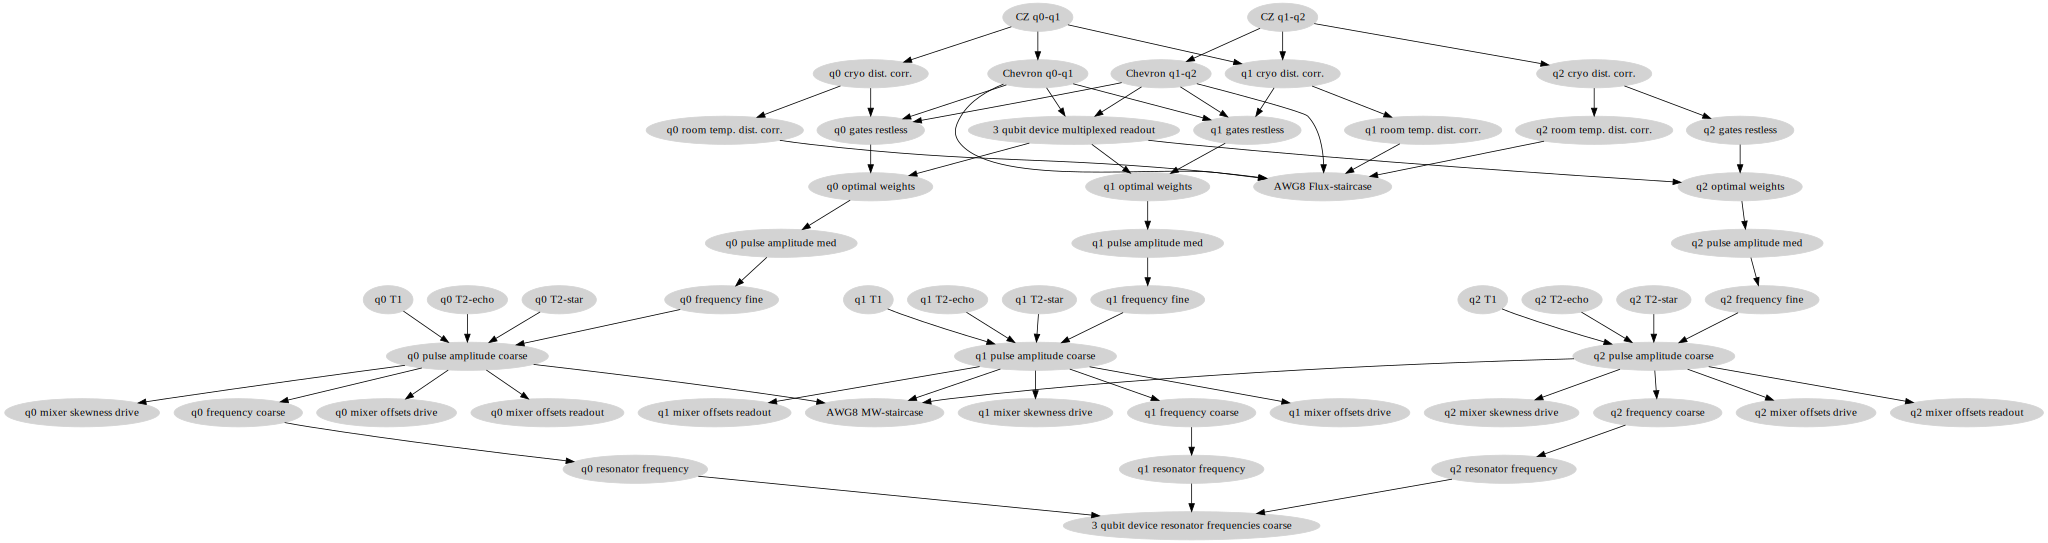

In [24]:
test_graph.cfg_plot_mode = 'svg'
DAG.update_monitor()
# This graph is so big, the html visualization is more suitable. 
display(SVG(DAG.cfg_svg_filename))

In [30]:
url = test_graph.open_html_viewer()
url

'/Users/adriaanrol/GitHubRepos/Personal/AutoDepGraph/autodepgraph/svg_viewer/svgviewer-6e8wz0xh.html'


### Reset the state of all nodes

In [25]:
DAG.nodes['CZ q0-q1']

{'calibrate_function': 'autodepgraph.node_functions.calibration_functions.test_calibration_True',
 'check_function': 'autodepgraph.node_functions.check_functions.return_fixed_value',
 'color': '#D3D3D3',
 'fillcolor': '#D3D3D3',
 'fixedsize': 'false',
 'last_update': datetime.datetime(2018, 3, 17, 23, 44, 29, 972265),
 'shape': 'ellipse',
 'state': 'unknown',
 'style': 'filled',
 'timeout': inf,
 'tolerance': 0}

In [26]:
DAG.set_all_node_states('needs calibration')
# DAG.set_all_node_states('unknown')
DAG.update_monitor()

In [27]:
DAG._construct_maintenance_methods(DAG.nodes.keys())

In [28]:
DAG.maintain_CZ_q0_q1()

Maintaining node "CZ q0-q1".
Maintaining node "Chevron q0-q1".
Maintaining node "3 qubit device multiplexed readout".
Maintaining node "q0 optimal weights".
Maintaining node "q0 pulse amplitude med".
Maintaining node "q0 frequency fine".
Maintaining node "q0 pulse amplitude coarse".
Maintaining node "AWG8 MW-staircase".
	Calibrating node AWG8 MW-staircase.
	Calibration of node AWG8 MW-staircase successful.
Maintaining node "q0 frequency coarse".
Maintaining node "q0 resonator frequency".
Maintaining node "3 qubit device resonator frequencies coarse".
	Calibrating node 3 qubit device resonator frequencies coarse.
	Calibration of node 3 qubit device resonator frequencies coarse successful.
	Calibrating node q0 resonator frequency.
	Calibration of node q0 resonator frequency successful.
	Calibrating node q0 frequency coarse.
	Calibration of node q0 frequency coarse successful.
Maintaining node "q0 mixer offsets drive".
	Calibrating node q0 mixer offsets drive.
	Calibration of node q0 mixe